# Jesús Octavio Raboso

Los enunciados del ejercicio aparecerán en color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

In [1]:
if (!require("crayon")) install.packages("crayon")
if (!require("foreach")) install.packages("foreach")
if (!require("RColorBrewer")) install.packages("RColorBrewer")

Loading required package: crayon

Loading required package: foreach

Loading required package: RColorBrewer



# Ejercicio de regularización
_(Actualizado: 11-01-2022)_

<font color='blue'>***En este ejercicio practicamos los fundamentos de la regularización L2 (ridge), en la que la minimización de la RSS con penalización tiene una forma explícita sencilla:
$$ (X^tX+\lambda I)\beta = X^ty$$
Utilizaremos los datos de una muestra sintética para conocer el verdadero modelo que tratamos de ajustar. Para ello:***</font>

## 1. 
<font color='blue'>***Generar datos sintéticos para la variable dependiente.***</font>
 
 <font color='blue'>***1.1. Para ello, escribe una función de R que reciba como argumentos de entrada un vector `x` con la variable independiente, un vector de parámetros ```alpha``` que contenga los coeficientes de un polinomio y una ```sigma```; y que devuelva el vector dependiente que siga la ley polinomial dada con PDF gaussiana y sigma (desviación estándar) dada: $y=\alpha_0 + \alpha_1 x + \ldots + \alpha_p x^p + \varepsilon$, con $\varepsilon\sim N(0,\sigma)$***</font>
 
 <font color='blue'>***1.2. Construye un vector `x` de 40 valores distribuidos aleatoriamente entre [-3, 3] siguiendo una distribución uniforme. Úsalo con la función anterior, considerando el polinomio: $x^3 + 2 x^2 - x - 2$ y $\sigma = 4$. Representa los datos resultantes.***</font>

LA siguiente función , dadu un vector de puntos y un vector de coeficientes, evalúa los puntos en el polinomio cuyos coeficientes son los del vector que recibe de input:

In [2]:
polyval <- function(x, coefs){
    
    #
    # Polynomial evaluation
    #
    # @description: y = polyval(x, coefs) evaluates the polynomia
    # whose coefficients are coefs at each point in x. 
    #
    # @param x: numeric vector. Points of evaluation.
    # @param coefs: numeric vector. It is a vector fo length n+1
    # whose elements are the coefficients (in ascending powers)
    # of an nth-degree polynomial
    #
    # @return : numeric array. Polynomial evaluation
    #
    
     c(cbind(1, poly(x, degree = length(coefs) - 1, raw = TRUE, simple = TRUE)) %*% coefs)    
}

In [3]:
# Uncommit to see an example
#polyval(x = 2, coefs = c(1,0,0,1))

Creamos la función que genera los datos sintéticos:

In [4]:
model <- function(x, alpha, sigma){
    
    #
    # @description: Create polynomial model.
    #
    # @param x: vector of float. Points to evaluate
    # @param alpha: vector of ploat. Polynomial coefficients.
    # @param sigma: float. Standard deviation for gaussian N(0, sigma)
    #
    # @return: float. Polynomial values.
    #
    
    residual <- rnorm(n = 1, mean = 0, sd = sigma)
    polynom <- polyval(x = x, coefs = alpha)
    return(polynom + residual)
    
}

Creamos el ejemplo particular:

In [5]:
# Set parameteres
my.x <- runif(40, -3, 3)
my.sigma <- 4
my.alpha <- c(-2,-1,2,1)

In [6]:
my.y <- model(x = my.x, alpha = my.alpha, sigma = my.sigma)

Graficamos los puntos obtenidos:

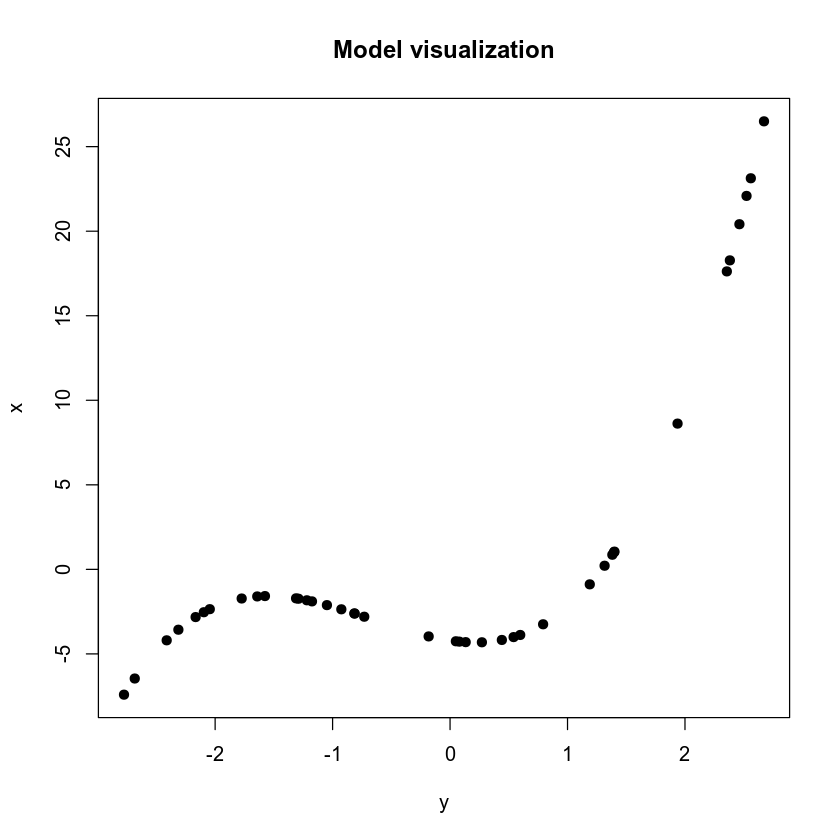

In [7]:
plot(my.x, my.y, pch = 19, xlab = "y", ylab = "x", main = "Model visualization")

## 2.
<font color='blue'>***Diseñar la matriz de covariables de la regresión o features $X$, que tendrá tantas filas como observaciones y columnas como `p+1`. Para ello, crea una función cuyos argumentos de entrada sean el vector `x` con la variable independiente y el grado del polinomio `p` con el que se desea ajustar los datos.***</font>


La relación entre la variable dependiente $y$ y el vector de características $x$ es de tipo polinómico:
$$ y = f(x) = \alpha_{0} + \alpha_{1}\cdot x + \alpha_{2}\cdot x^{2} + ... + \alpha_{p}\cdot x^{p}. $$


Tal y como vimos en la clase teórica, dada una relación $y = f(x) = \alpha_{0} + \alpha_{1}\cdot x + \alpha_{2}\cdot x^{2} +... + \alpha_{p}\cdot x^{p}$  expandimos artificialmente la dimensión de $x$ añadiendo potencias de las propias $x$. En forma matricial, el modelo puede expresarse como:

$$\begin{bmatrix}
y_{1} \\ y_{2} \\ \vdots \\ y_{N}
\end{bmatrix} = 
\begin{bmatrix} 
	1 & x_{1} & x_{1}^{2} & \dots & x_{1}^{p} \\
	1 & x_{2} & x_{2}^{2} & \dots & x_{2}^{p} \\
    \vdots & \vdots       & \vdots &  \vdots& \vdots  \\
	1 & x_{N} & x_{N}^{2} & \dots & x_{N}^{p} \\
	\end{bmatrix}
    \begin{bmatrix} 
	\alpha_{0}\\
	\alpha_{1}\\
    \alpha_{2}\\
    \vdots \\
    \alpha_{p}\\
	\end{bmatrix}
$$
es decir:
$$ y= X\alpha$$


In [8]:
featmatrix <- function(x, p){
    
    # Matrix of features.
    
    X <- outer(X = x, Y = 0:p, FUN =  "^")
    return(X)
}

## 3.
<font color='blue'>***Calcula el valor mínimo de la función de coste (_loss_, RSS) para el caso en que hacemos un ajuste con una recta (dos parámetros), una parábola (tres parámetros), 4, 5, 6 y 7 parámetros sin considerar la regularización, es decir, resolviendo $ (X^tX)\beta = X^ty$, usando los primeros 20 puntos. Con los valores de $\beta$ que hacen mínimo el RSS para la muestra de entrenamiento, calcula el RSS para los otros 20 puntos. Representa los resultados en función del número de parámetros para ambos casos.***</font>




Para hallar los coeficientes que minimizan la función de coste (cuadrado de la distancia euclídea), empleamos:
$$ \hat{\alpha} = (X^{T}X)^{-1}X^{T}y$$
que es el vector que contiene los coeficientes que minimizan el polinomio de regresión.

La función de coste RSS se define como:
$$ \text{RSS} = \sum_{i=1}^{N}\left(y_{i} - \beta_{0} - \sum_{j=1}^{p}\beta_{j}x_{ij}\right)$$

La siguiente función minimiza la función de coste empleando la fórmula analítica:

In [9]:
min.rss <- function(X, y){
    
    #
    # Let x be a feature vector (independent variable).
    # Let y be a predicted vector (dependet variable).
    # Given a linear regression with multiple features 
    # y = alpha * X, calculates parameters alpha so the cost function
    # (square of euclidean distance) is minimum.
    #
    # @description Minimize cost function (square of euclidean distance) for linear regression with multiple features.
    #
    # @param X numeric array Features array. Independet variable. 
    # @param y numeric vector. Predicted vector. Dependent variable.
    #
    # @return numeric array. ALphas where minimum is reached.
    #
    
    return(solve(t(X)%*%X) %*% t(X) %*% y)
    
}

Estamos empleando la función de coste dada por:

In [10]:
# Función de coste:
rss <- function(X, y, beta){
    
    # @description: RRS cost function.
    
    return(sum( (y - t(beta)%*% t(X))^2 ))
}

Consideramos difernetes números de parámetros:

In [11]:
rss.train <- list()
rss.test <- list()
my.coefs <- list()


for (my.p in 1:6){

    cat(bold(red(paste(my.p + 1, "parameters \n"))))
    
    my.X <- featmatrix(x = my.x , p = my.p)
    my.beta <- min.rss(X = my.X[1:20,] , y = my.y[1:20])
    cat("Optimum beta \n")
    print(my.beta)
    
    my.coefs[[my.p]] <- my.beta
    
    cat("\n RSS for train: ")
    rss.val.train <- rss(X = my.X[1:20, ], y  = my.y[1:20], beta = my.beta)
    cat(rss.val.train)
    
    rss.train[[my.p]] <- rss.val.train
    
    cat("\n RSS for test: ")
    rss.val.test <- rss(X = my.X[21:40, ], y  = my.y[21:40], beta = my.beta)
    cat(rss.val.test)
    
    rss.test[[my.p]] <- rss.val.test
    
    cat("\n\n\n")
    
    
}

2 parameters 
Optimum beta 
         [,1]
[1,] 3.005836
[2,] 4.114323

 RSS for train: 562.3138
 RSS for test: 913.0048


3 parameters 
Optimum beta 
          [,1]
[1,] -2.200438
[2,]  3.914822
[3,]  1.694809

 RSS for train: 266.7899
 RSS for test: 254.895


4 parameters 
Optimum beta 
          [,1]
[1,] -4.208908
[2,] -1.000000
[3,]  2.000000
[4,]  1.000000

 RSS for train: 2.090432e-27
 RSS for test: 2.378711e-27


5 parameters 
Optimum beta 
              [,1]
[1,] -4.208908e+00
[2,] -1.000000e+00
[3,]  2.000000e+00
[4,]  1.000000e+00
[5,] -2.459838e-15

 RSS for train: 5.766997e-26
 RSS for test: 5.907168e-26


6 parameters 
Optimum beta 
              [,1]
[1,] -4.208908e+00
[2,] -1.000000e+00
[3,]  2.000000e+00
[4,]  1.000000e+00
[5,] -8.847090e-17
[6,]  9.315465e-16

 RSS for train: 2.309203e-25
 RSS for test: 3.231225e-25


7 parameters 
Optimum beta 
              [,1]
[1,] -4.208908e+00
[2,] -1.000000e+00
[3,]  2.000000e+00
[4,]  1.000000e+00
[5,] -1.664641e-13
[6,]  2.251

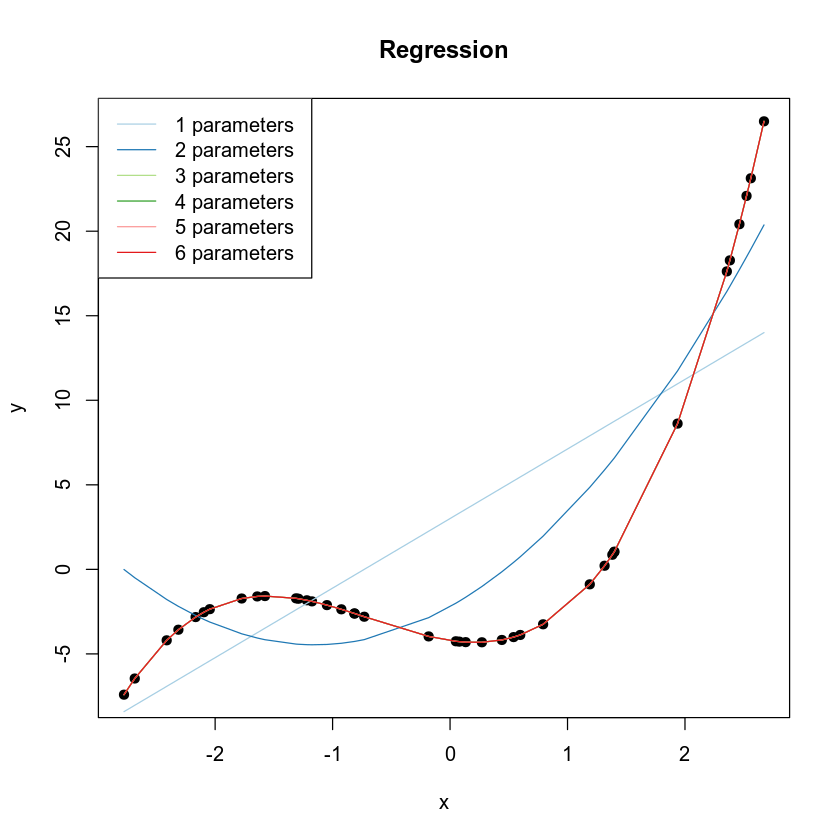

In [12]:
colors = brewer.pal(length(my.coefs), "Paired")

plot(my.x, my.y, pch = 19, col = "black", xlab = "x", ylab = "y", main = "Regression")

for (i in 1:length(my.coefs)){
    lines(sort(my.x), polyval(my.x, my.coefs[[i]])[order(my.x)], col = colors[i])
}
legend("topleft", legend = paste(1:6, "parameters"),
       lty = 1,
       col = colors)

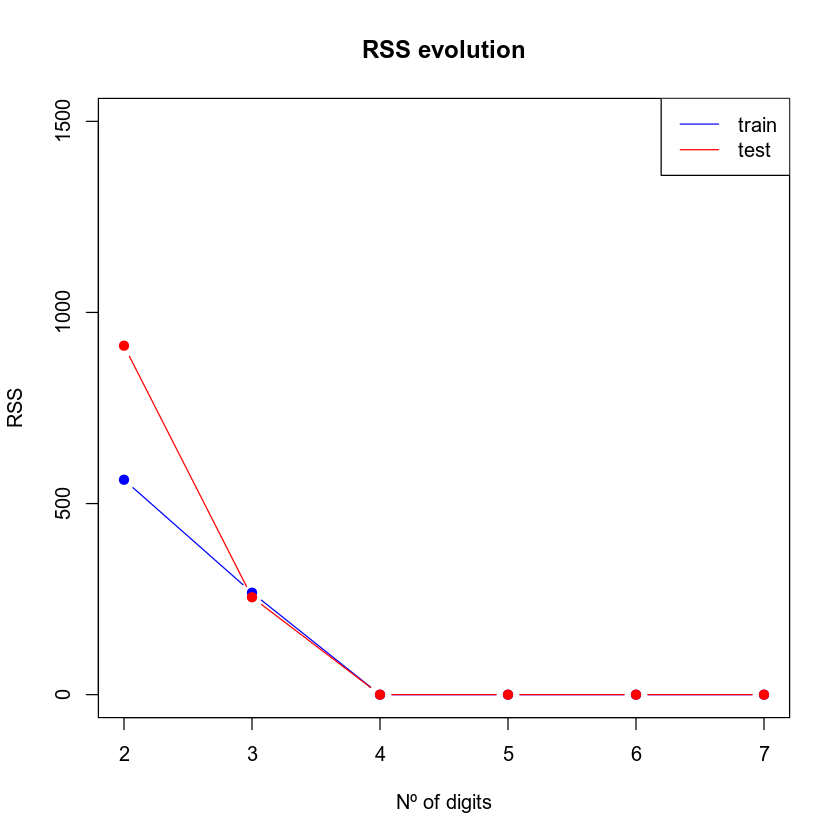

In [13]:
plot(2:7, rss.train, pch = 19, type = "b", col = "blue", ylim = c(0, 1500),
     main = "RSS evolution", xlab = "Nº of digits", ylab = "RSS")
lines(2:7, rss.test, pch = 19, type = "b", col = "red")


legend("topright", legend = c("train", "test"),
       lty = 1,
       col = c("blue", "red"))

## 4.
<font color='blue'>***Escribe una función de R que encuentre el mínimo de la función de coste para el caso de la regularización L2, es decir, resolviendo $(X^tX+\lambda I)\beta = X^ty$. El parámetro lambda será pasado como entrada a esta función. Utilízala para estimar las curvas que mejor ajustan para los casos:***</font>
  * <font color='blue'>***3 parámetros, lambda=0***</font>
  * <font color='blue'>***10 parámetros, lambda=0***</font>
  * <font color='blue'>***10 parámetros, lambda=1000***</font>

<font color='blue'>***Representa todas las curvas juntas y escribe tus conclusiones.***</font>

Se define la función de coste PRSS como:
$$\text{PRSS} = \text{RSS}  + \lambda\sum_{j=1}^{p}\beta_{j}^{2}.$$

Por tanto, cuando $\lambda = 0$, la penalización no afecta y la regresión L2 no es tal. Se comporta como si se minimizase la función de coste dada por el cuadrado de la distancia euclídea (RSS). 

In [14]:
prss <- function(X, y, beta, lambda){
    
     # @description: PRRS cost function.
    
    return(sum((y - t(beta)%*% t(X))^2) + lambda * (norm(beta[2:length(beta)], type = "2")))
}

In [15]:
min.prss <- function(X, y, lambda){
    
    #
    # Let x be a feature vector (independent variable).
    # Let y be a predicted vector (dependet variable).
    # Given a linear regression with multiple features 
    # y = alpha * X, calculates parameters alpha so the cost function
    # (square of euclidean distance) is minimum.
    #
    # @description Minimize cost function (square of euclidean distance) for linear regression with multiple features.
    #
    # @param X numeric array Features array. Independet variable. 
    # @param y numeric vector. Predicted vector. Dependent variable.
    #
    # @return numeric array. ALphas where minimum is reached.
    #
    
    return(solve(t(X)%*%X + (lambda * diag(ncol(X)))) %*% t(X) %*% y)
    
}

In [16]:
var.list <- list(
  my.p = c(2,9,9),
  my.lambda = c(0,0,1000)
)

In [17]:
prss.train <- list()
prss.test <- list()
betas <- list()

for (i in 1:length(var.list$my.p)){
    cat(bold(red(paste0("Nº parameters = ", var.list$my.p[i] + 1,
                        "; lambda = ",var.list$my.lambda[i], "\n"))))
    
    my.X <- featmatrix(x = my.x , p = var.list$my.p[i])
    my.beta <- min.prss(X = my.X[1:20,] , y = my.y[1:20], lambda = var.list$my.lambda[i])
    cat("Optimum beta \n")
    print(my.beta)
    
    betas[[i]] <- my.beta
    
    cat("\n PRSS for train: ")
    prss.val.train <- prss(X = my.X[1:20, ], y = my.y[1:20], beta = my.beta, lambda = var.list$my.lambda[i])
    cat(prss.val.train)
    
    prss.train[[i]] <- prss.val.train
    
    cat("\n PRSS for test: ")
    prss.val.test <- prss(X = my.X[21:40, ], y  = my.y[21:40], beta = my.beta, lambda = var.list$my.lambda[i])
    cat(prss.val.test)
    
    prss.test[[i]] <- prss.val.test
    
    cat("\n\n\n")
    
}

Nº parameters = 3; lambda = 0
Optimum beta 
          [,1]
[1,] -2.200438
[2,]  3.914822
[3,]  1.694809

 PRSS for train: 266.7899
 PRSS for test: 254.895


Nº parameters = 10; lambda = 0
Optimum beta 
               [,1]
 [1,] -4.208908e+00
 [2,] -1.000000e+00
 [3,]  2.000000e+00
 [4,]  1.000000e+00
 [5,]  3.328537e-11
 [6,]  1.639311e-11
 [7,] -5.552891e-12
 [8,] -4.193978e-12
 [9,]  4.504348e-13
[10,]  2.508636e-13

 PRSS for train: 1.239565e-17
 PRSS for test: 1.963674e-17


Nº parameters = 10; lambda = 1000
Optimum beta 
              [,1]
 [1,] -0.018808848
 [2,]  0.014140663
 [3,] -0.013396068
 [4,]  0.021194873
 [5,]  0.002451495
 [6,]  0.033895233
 [7,]  0.059867190
 [8,]  0.044956483
 [9,] -0.004553051
[10,] -0.004570209

 PRSS for train: 138.7944
 PRSS for test: 238.9676




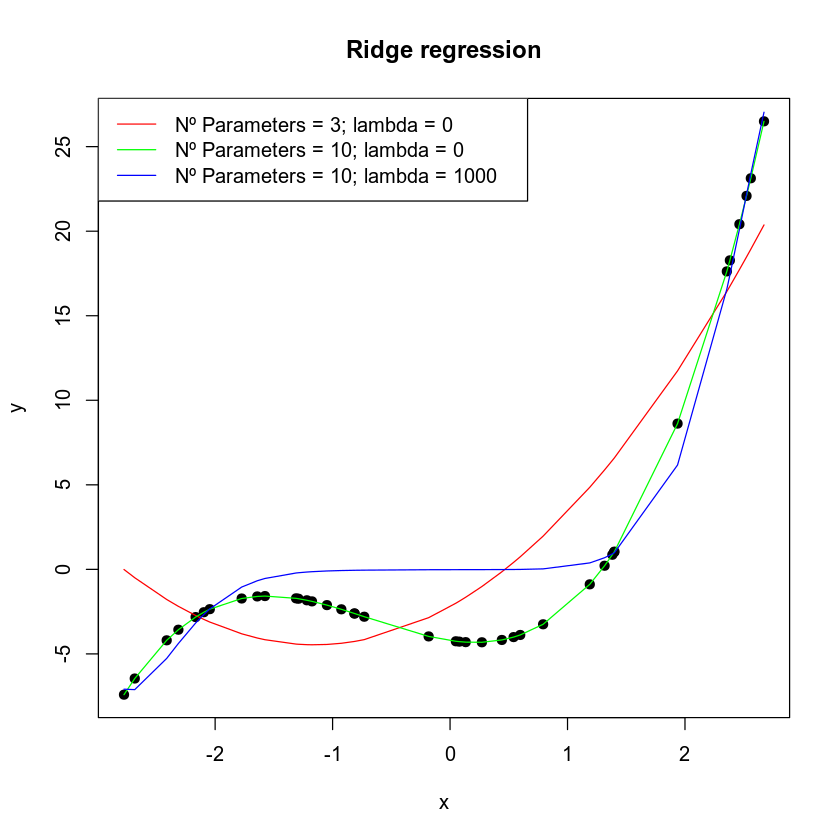

In [18]:
plot(my.x, my.y, pch = 19, col = "black", xlab = "x", ylab = "y", main = "Ridge regression")
lines(sort(my.x), polyval(my.x, unlist(betas[1]))[order(my.x)], col = "red")
lines(sort(my.x), polyval(my.x, unlist(betas[2]))[order(my.x)], col = "green")
lines(sort(my.x), polyval(my.x, unlist(betas[3]))[order(my.x)], col = "blue")
legend("topleft", ncol = 1, lty = 1,
       legend = c('Nº Parameters = 3; lambda = 0', "Nº Parameters = 10; lambda = 0", "Nº Parameters = 10; lambda = 1000") ,
       col = c("red", "green", "blue"))

## 5.
<font color='blue'>***Utiliza la función anterior para representar el valor de los parámetros del modelo en función de $\lambda$, dando valores a $\lambda$ entre $0.001$ y $10000$. Prueba a representar la evolución de los coeficientes de un modelo de 11 parámetros (usando una escala logarítmica para lambda).***</font>

In [20]:
prss.train <- c()
prss.test <- c()
my.lambdas <-  seq(0.001, 50000, 100)
my.mat <- matrix(, nrow = 11, ncol = length(my.lambdas))
my.p <- 10
i <- 1

for (lambda in my.lambdas){
    cat(bold(red(paste0("Nº parameters = ", 11,
                        "; lambda = ", lambda, "\n"))))
    
    my.X <- featmatrix(x = my.x , p = my.p)
    my.beta <- min.prss(X = my.X[1:20,] , y = my.y[1:20], lambda = lambda)
    cat("Optimum beta \n")
    print(my.beta)
    
    my.mat[, i] <- my.beta
    i <- i+1
    
    cat("\n RSS for train: ")
    prss.val.train <- prss(X = my.X[1:20, ], y  = my.y[1:20], beta = my.beta, lambda = lambda)
    cat(prss.val.train)
    
    prss.train.l2 <- c(prss.train, prss.val.train)
    
    cat("\n PRSS for test: ")
    prss.val.test <- prss(X = my.X[21:40, ], y  = my.y[21:40], beta = my.beta, lambda = lambda)
    cat(prss.val.test)
    
    prss.test <- c(prss.test, prss.val.train)
    
    cat("\n\n\n")
    
}

Nº parameters = 11; lambda = 0.001
Optimum beta 
               [,1]
 [1,] -4.1484263206
 [2,] -1.0241047620
 [3,]  1.8114842628
 [4,]  1.0084276572
 [5,]  0.1501447735
 [6,]  0.0051906302
 [7,] -0.0458618452
 [8,] -0.0018307935
 [9,]  0.0060004542
[10,]  0.0001387026
[11,] -0.0002832157

 RSS for train: 0.002852237
 PRSS for test: 0.02148928


Nº parameters = 11; lambda = 100.001
Optimum beta 
              [,1]
 [1,] -0.141450768
 [2,]  0.077915621
 [3,] -0.090910742
 [4,]  0.078840350
 [5,] -0.047031823
 [6,]  0.060130279
 [7,]  0.019507646
 [8,]  0.031805923
 [9,]  0.017669357
[10,] -0.003568967
[11,] -0.002126624

 RSS for train: 53.39855
 PRSS for test: 156.5256


Nº parameters = 11; lambda = 200.001
Optimum beta 
              [,1]
 [1,] -0.077239691
 [2,]  0.047439778
 [3,] -0.054220804
 [4,]  0.053058845
 [5,] -0.036488405
 [6,]  0.051430283
 [7,] -0.003755881
 [8,]  0.037280311
 [9,]  0.023242121
[10,] -0.004081087
[11,] -0.002498044

 RSS for train: 64.09306
 PRSS for test: 

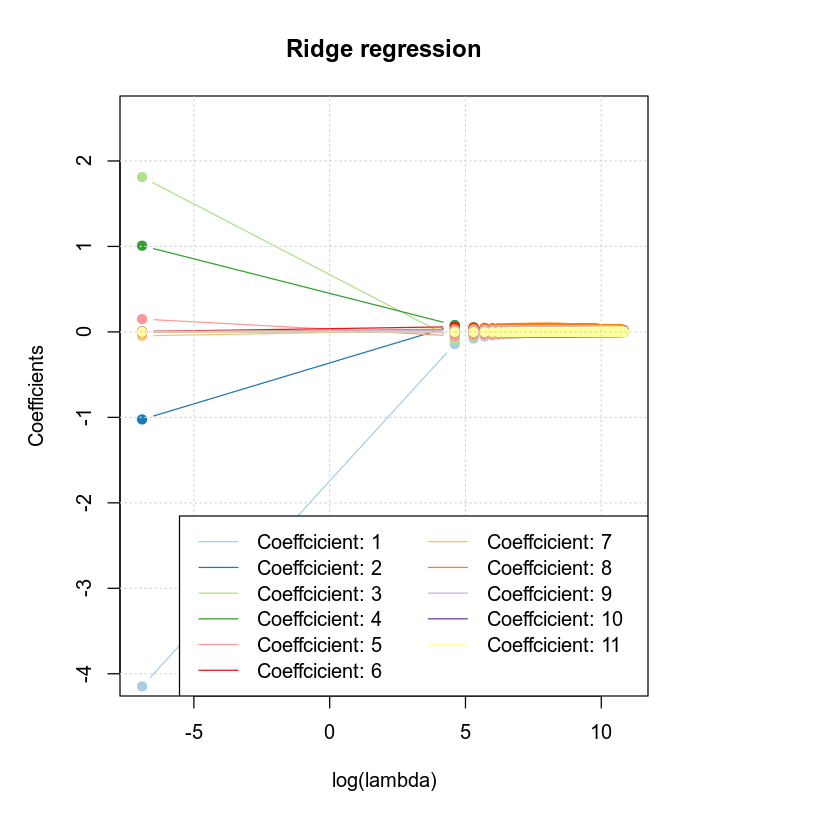

In [21]:
colors = brewer.pal(11, "Paired")
opar <- par(no.readonly = TRUE)
par(mar = c(6, 5, 4, 8))

plot(NULL, xlab = "log(lambda)", ylab = "Coefficients", xlim = c(-7, 11), ylim = c(-4,2.5),
      main = "Ridge regression")

for (i in 1:nrow(my.mat)){
    lines(log(my.lambdas), my.mat[i, ], col = colors[i],  pch = 19, type = 'b')
}

grid()

legend("bottomright", ncol = 2, lty = 1,
       legend = paste0('Coeffcicient: ', 1:nrow(my.mat)) , col =  colors)

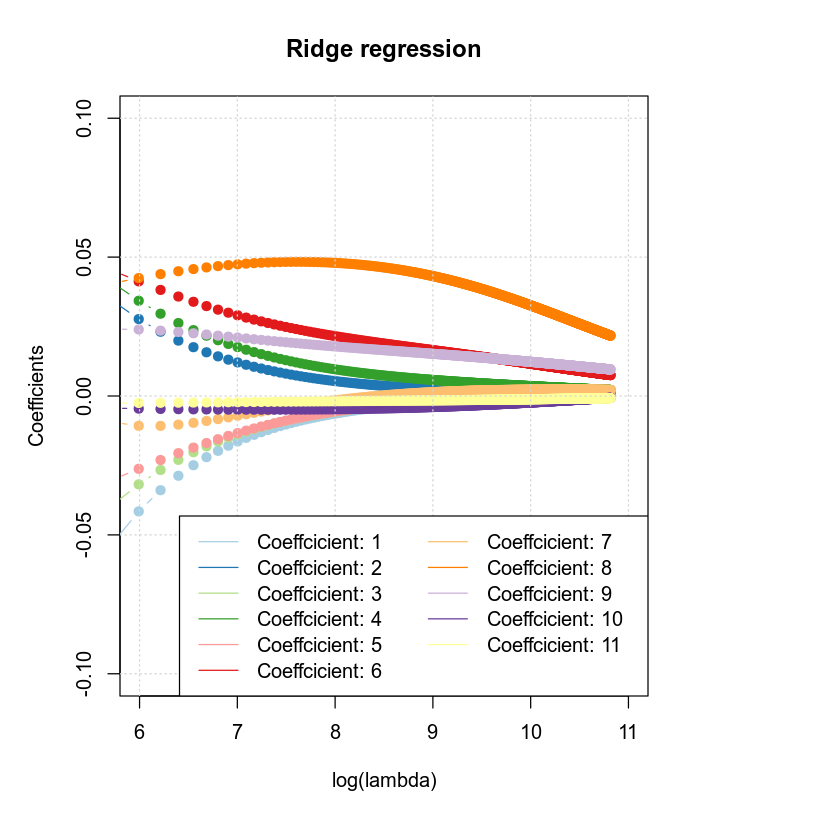

In [22]:
colors = brewer.pal(11, "Paired")
opar <- par(no.readonly = TRUE)
par(mar = c(6, 5, 4, 8))

plot(NULL, xlab = "log(lambda)", ylab = "Coefficients", xlim = c(6, 11), ylim = c(-0.1,0.1),
      main = "Ridge regression")

for (i in 1:nrow(my.mat)){
    lines(log(my.lambdas), my.mat[i, ], col = colors[i],  pch = 19, type = 'b')
}

grid()

legend("bottomright", ncol = 2, lty = 1,
       legend = paste0('Coeffcicient: ', 1:nrow(my.mat)) , col =  colors)